In [545]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')
df

,ID,Movie_Name,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.90,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
95,95,American Beauty,1999,122,8.3,84.0,130.10,"11,80,519",A sexually frustrated suburban father has a mi...
96,96,Requiem for a Dream,2000,102,8.3,71.0,3.64,"8,68,981",The drug-induced utopias of four Coney Island ...
97,97,Good Will Hunting,1997,126,8.3,70.0,138.43,"10,14,823","Will Hunting, a janitor at M.I.T., has a gift ..."
98,98,2001: A Space Odyssey,1968,149,8.3,84.0,56.95,"6,92,341",After uncovering a mysterious artifact buried ...


In [546]:
df.drop(['Movie_Name', 'Description', 'Votes'], axis=1, inplace=True)
df

,ID,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross
0,0,1994,142,9.3,82.0,28.34
1,1,1972,175,9.2,100.0,134.97
2,2,2008,152,9.0,84.0,534.86
3,3,1993,195,9.0,95.0,96.90
4,4,1957,96,9.0,97.0,4.36
...,...,...,...,...,...,...
95,95,1999,122,8.3,84.0,130.10
96,96,2000,102,8.3,71.0,3.64
97,97,1997,126,8.3,70.0,138.43
98,98,1968,149,8.3,84.0,56.95


In [547]:
#Metascore
df['missing_metascore'] = df['Metascore'].isnull()
median_metascore = df['Metascore'].median()
df['Metascore'].fillna(median_metascore, inplace=True)

#Gross
df['missing_gross'] = df['Gross'].isnull()
median_gross = df['Gross'].median()
df['Gross'].fillna(median_gross, inplace=True)

In [548]:
# Filter the rows where data was imputed
imputed_rows = df[df['missing_metascore'] | df['missing_gross']]
# Remove the newly created columns
df.drop(['missing_metascore', 'missing_gross'], axis=1, inplace=True)

# Display
imputed_data = imputed_rows[['ID', 'Metascore', 'Gross']]
print(imputed_data)

    ID  Metascore   Gross
15  15       84.5  219.00
16  16       84.5   62.00
23  23       84.5   62.00
24  24       84.5   62.00
37  37       84.5   62.00
59  59       84.5   62.00
73  73       84.5   91.00
85  85       84.5    0.29
87  87       84.5   62.00
88  88       84.5   62.00
89  89       84.5   62.00
90  90       84.5   62.00


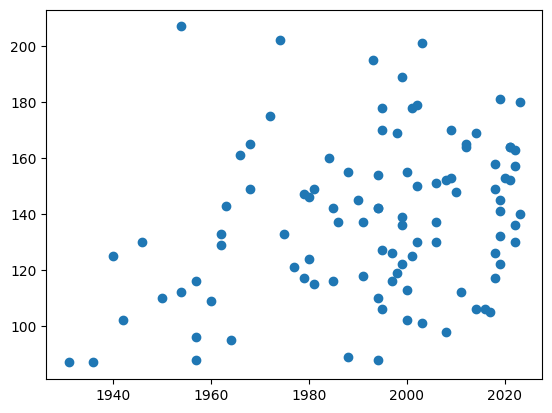

In [549]:
plt.scatter(df.Year_of_Release, df.Watch_Time)
plt.show()

In [550]:
def Lossfunction(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['Year_of_Release']
        y = points.ilocl[i]['Watch_Time']
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

In [551]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i]['Year_of_Release']
        y = points.iloc[i]['Watch_Time']
        
        m_gradient += - (2 / n) * x * (y - (m_now * x + b_now)) 
        b_gradient += - (2 / n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [552]:
m = 0
b = 0
L = 0.0000001
epochs = 850

In [553]:
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, df, L)

Epoch: 0


Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800


0.06933280056658181 2.2550019136127723e-05


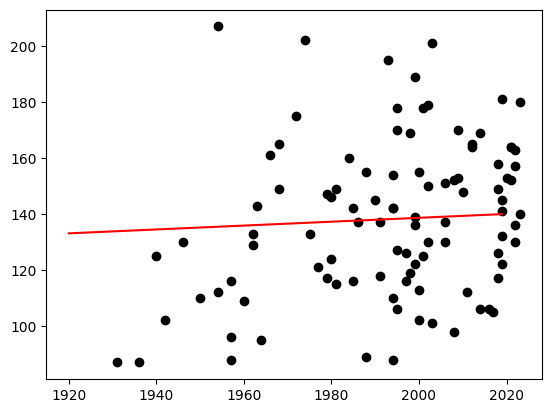

In [554]:
print(m, b)
plt.scatter(df.Year_of_Release, df.Watch_Time, color="black")
plt.plot(list(range(1920, 2020)), [m * x + b for x in range(1920, 2020)], color="red")
plt.show()

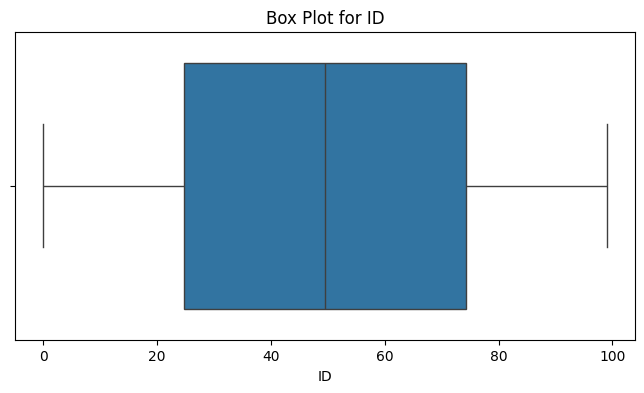

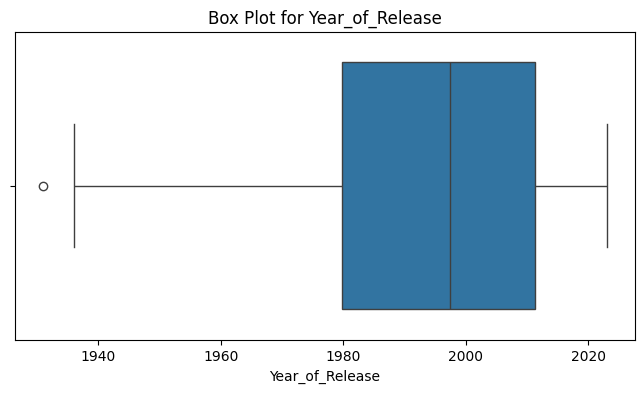

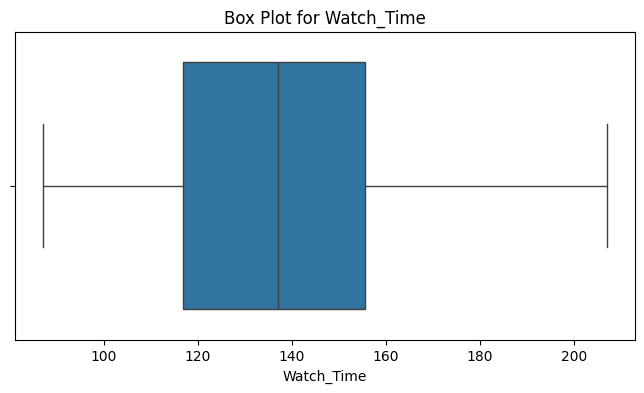

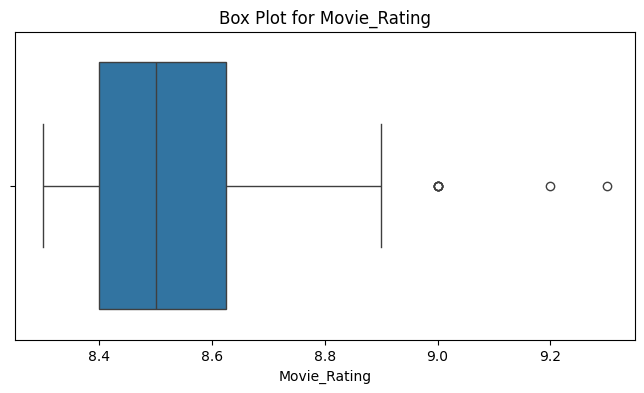

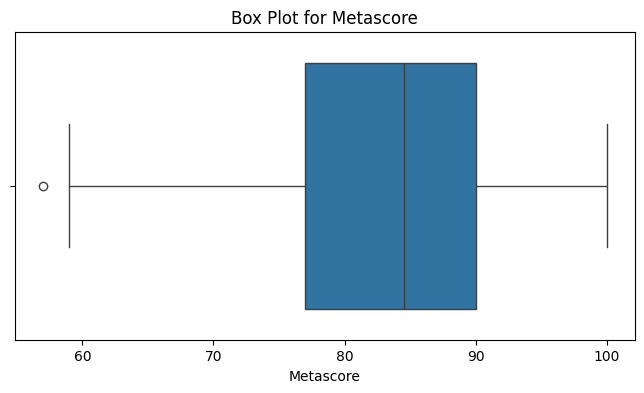

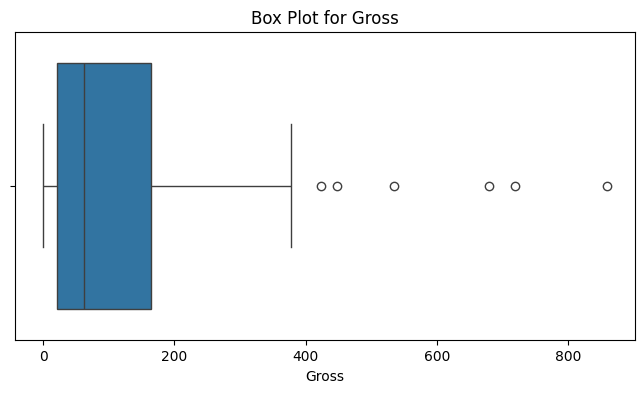

In [555]:
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

<Axes: >

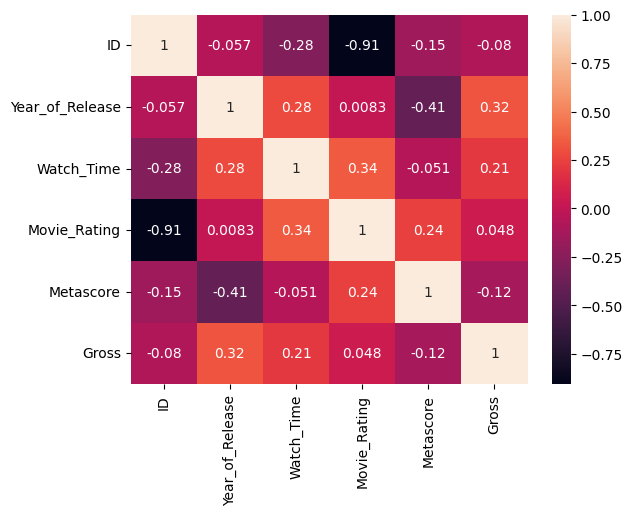

In [556]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)